## The Sparks Foundation (GRIP)

## Data Science and Business Analyst Intern (May 2021)

# AUTHOR: Kshitij Vijayvergiya

## TASK1: Prediction Using Supervised ML

## DESCRIPTION: Predict the percentage of a student based on the no. of study hours using simple linear regression.

## Step1: IMPORTING THE LIBRARIES

In [38]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Step2: READING THE DATA FROM A REMOTE LINK

In [6]:
data = "http://bit.ly/w-data"
df = pd.read_csv(data)
print("Data successfully imported!! ")

df.head(10)

Data successfully imported!! 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step3: VISUALIZATION OF DATA

### 1. Scatter Plot

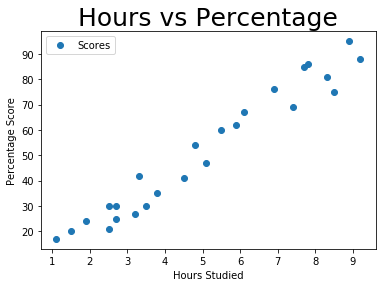

In [9]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', fontsize=25)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### 2. Regplot

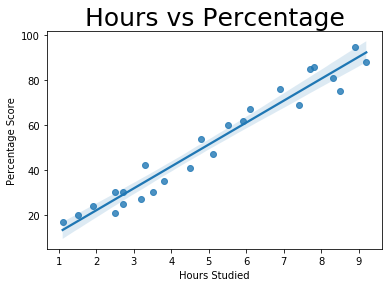

In [63]:
ax = sns.regplot(x="Hours", y="Scores", data=df)
plt.title('Hours vs Percentage', fontsize=25)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### From the above 2 graphs, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Step4: PREPARING THE DATA

### Let's divide our data into attributes/features which will act as inputs and labels which will act as output.

In [55]:
x = df.iloc[:, :-1].values #taking all the rows and first column, i.e, 'Hours' column from df 
y = df.iloc[:, 1].values #taking all the rows and second column, i.e, 'Scores' column from df

### As we have our attributes and labels so now we will split our data into training and test set. For that we will use Scikit-Learn's built-in train_test_split() method.

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

## Step5: TRAINING THE MODEL

### In this section our training data will come into use.

In [57]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

print('Training Complete!!')

Training Complete!!


### Plotting the regression line

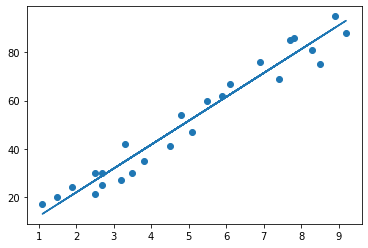

In [44]:
"""
regressor.coef_ is estimated coefficients. In this problem we have only one feature so coef_ will contain only one
element.
regressor.intercept_ is independent term in the linear model.
""" 

line = regressor.coef_*x+regressor.intercept_ 
                                                
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Step6: PREDICTIONS WITH OUR MODEL

### We can finally use our model to predict the score of a student given the hours of studying.

In [46]:
y_pred = regressor.predict(x_test) # Predicting the scores

In [58]:
x_test # attribute values of test data

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

### Let's see how far is our predicted values are fom actual values.

In [59]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Hours':[1.5,3.2,7.4,2.5,5.9], 'Actual': y_test, 'Predicted': y_pred})  
df1 

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


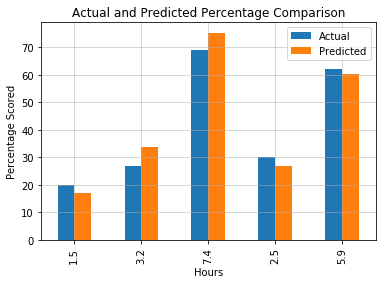

In [75]:
df1.plot(x="Hours", y=["Actual", "Predicted"], kind="bar")
plt.grid(linewidth='0.5')
plt.title("Actual and Predicted Percentage Comparison")
plt.ylabel('Percentage Scored')
plt.show()

### Experimenting with our own value of 'Hours' feature

In [71]:
# We can also test with our own data.
hrs = 9.25
own_pred = regressor.predict([[hrs]])
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


##  Step7: EVALUATION OF MODEL

### The final step is to evaluate the performance of algorithm. Various metrics can be used to evaluate a model performance. Here we have used Mean Absolute Error.

In [72]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


## CONCLUSION:
### With the help of our simple linear regression model we predict percentage score given the number of study hours.